In [1]:
# imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotting

# Fundamental Functions
- Animation
- Cooling schedules

## Animation

In [2]:
# code herse

## Cooling schedules

In [3]:
high_temp = 50
low_temp = 0.01
n_temps = 10000

# temperature functions used
wave_func = lambda x: x+np.exp(-0.001*-x)*np.sin(1*-x)
exponential_even = np.geomspace(high_temp, low_temp, n_temps)
exponential_0003 = np.exp(-np.arange(0, n_temps) * 30 / n_temps) * high_temp
linear = np.linspace(high_temp, low_temp, n_temps)


wavy_lin = linear+np.exp(-0.02*-linear)*np.sin(1*-linear)

Markov chain length of 1.


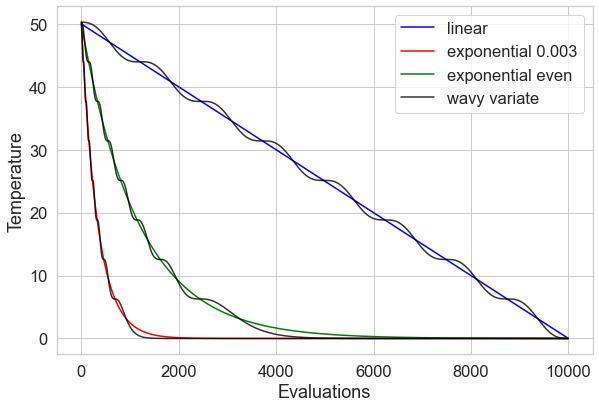

In [4]:
# sns.set_context(font_scale=1)
print("Markov chain length of 1.")

sns.set(font_scale = 1.5,style='whitegrid')
# sns.set_theme(style="whitegrid")

fig = plt.figure(figsize=(12*0.8,8*0.8))
offset_x = np.arange(n_temps)-0 # offest of wavy variates

# non wavy
ax1 = sns.lineplot(linear,label='linear',color='blue',alpha=1)
sns.lineplot(exponential_0003,label='exponential 0.003',color='red',alpha=1,ax=ax1)
sns.lineplot(exponential_even,label='exponential even',color='green',alpha=1,ax=ax1)

# wavy variates
sns.lineplot(x=offset_x, y=wave_func(linear),color='black',alpha=.8, label='wavy variate',ax=ax1)
sns.lineplot(x=offset_x, y=wave_func(exponential_even),color='black',alpha=.8,ax=ax1)
sns.lineplot(x=offset_x, y=wave_func(exponential_0003),color='black',alpha=.8,ax=ax1)
plt.xlabel("Evaluations", fontsize=18)
plt.ylabel("Temperature", fontsize=18)

plt.savefig("Images/Cooling_Schedules.svg", dpi=300, bbox_inches='tight')

# Main Analysis

- magic numbers
- Convergence: cooling schedules
- Convergence: Force
- Convergence: MC length

## Magic Numbers

In [5]:
# code here

## Convergence: Cooling schedules and Force

In [6]:
# no force
fname1_nf = 'linear_data_100runs_noforce.csv'
fname2_nf = 'ex_even_data_100runs_noforce.csv'
fname3_nf = 'ex_0003_data_100runs_noforce.csv'

# force
fname1_f = 'linear_data_100runs_force.csv'
fname2_f = 'ex_even_data_100runs_force.csv'
fname3_f = 'ex_0003_data_100runs_force.csv'

# force
fname1_lf = 'linear_data_100runs_lateforce.csv'
fname2_lf = 'ex_even_data_100runs_lateforce.csv'
fname3_lf = 'ex_0003_data_100runs_lateforce.csv'

names = 'linear', "exponential even spacing", "exponential 0.003"

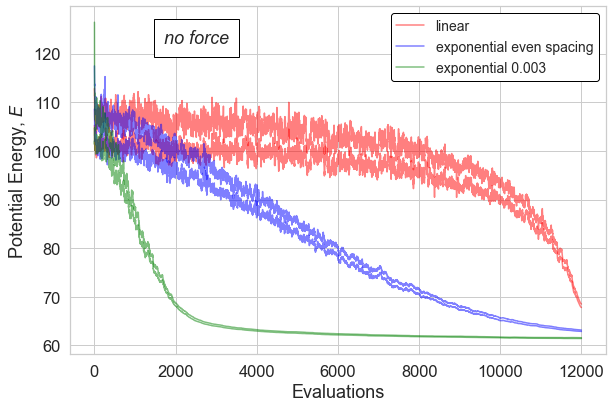

In [7]:
plotting.plot_convergence_compare(fname1_nf, fname2_nf, fname3_nf,'no force',pic_name='noforce_convergence_ci', names=names)

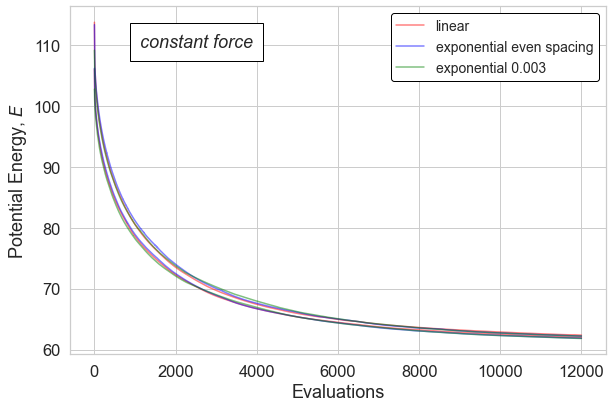

In [8]:
plotting.plot_convergence_compare(fname1_f, fname2_f, fname3_f, 'constant force' ,pic_name='constant_force_convergence_ci', names=names)

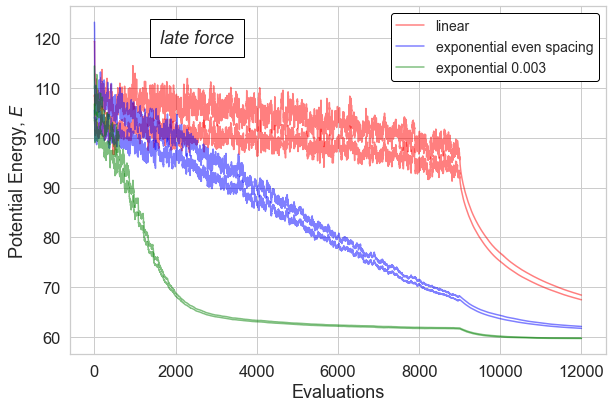

In [9]:
plotting.plot_convergence_compare(fname1_lf, fname2_lf, fname3_lf,'late force', pic_name='late_force_convergence_ci', names=names)

### P-value
Plotting p-value results from t-tests over 100 simulations per cooling schedule and force type.

In [10]:
%matplotlib inline

Comparing Cooling schedules


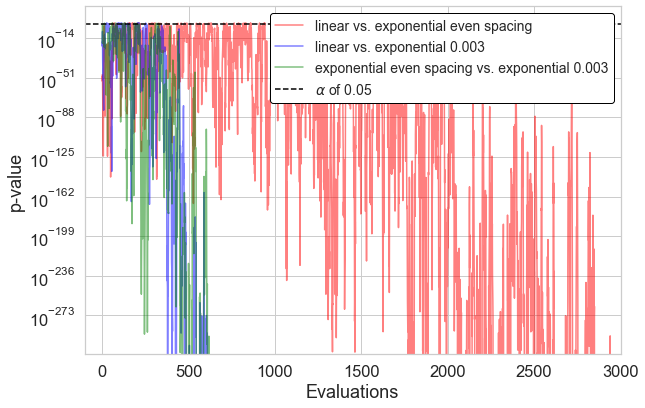

In [11]:
plotting.plot_convergence_pval(fname1_nf, fname2_nf, fname3_nf,pic_name='pval_cooling',
                      names=[(names[0], names[1]), (names[0], names[2]), (names[1], names[2])],first_n_iters=3000,leg_loc='upper right')
print("Comparing Cooling schedules")

Comparing Force implementations on p-value of convergence for the most promising cooling schedule: exponential 0.003


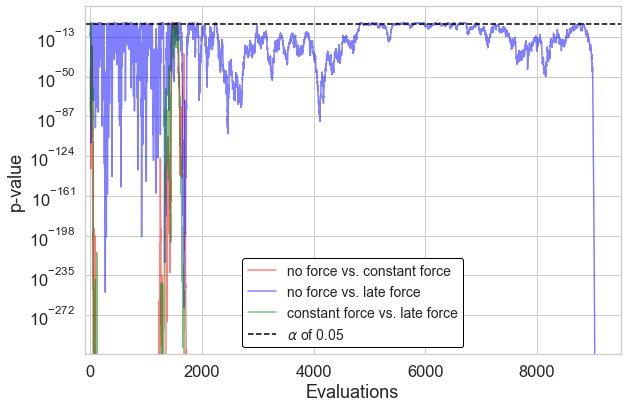

In [12]:
names = 'no force', "constant force", "late force"
plotting.plot_convergence_pval(fname3_nf, fname3_f, fname3_lf,pic_name='pval_forces',
                      names=[(names[0], names[1]), (names[0], names[2]), (names[1], names[2])],first_n_iters=9500)
print("Comparing Force implementations on p-value of convergence for the most promising cooling schedule: exponential 0.003")


## Convergence: Markov Chain length

In [13]:
# code here

# Exploratory

## Wavy cooling schedules

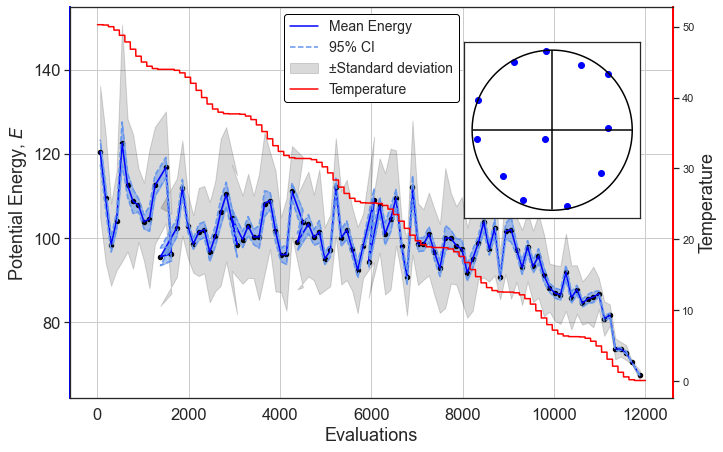

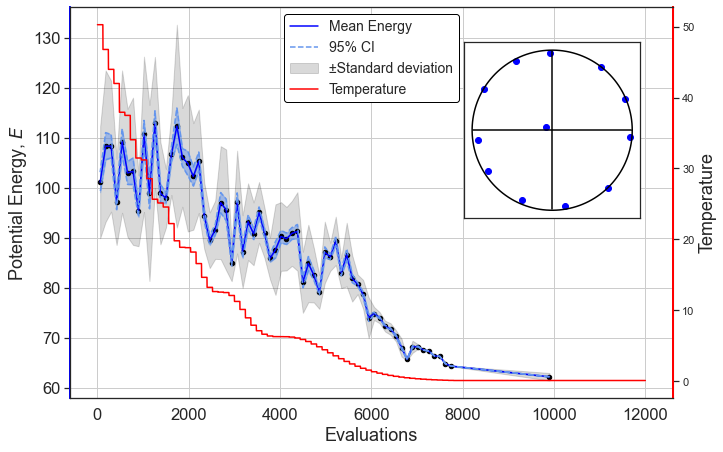

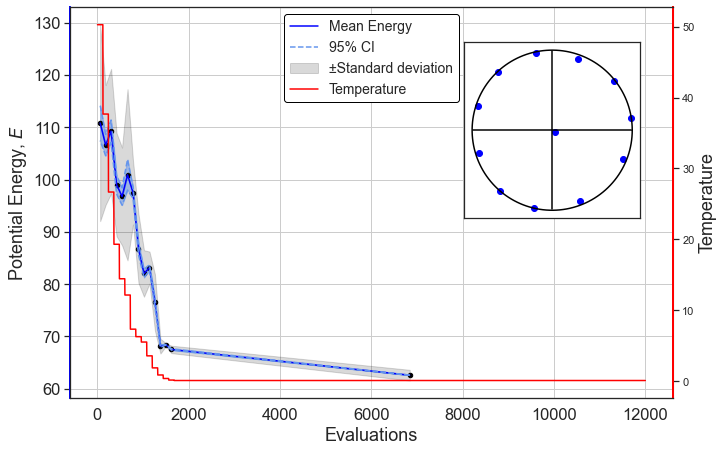

In [14]:
plotting.plot_convergence('12_linear_100_10_noforce_wavy',plot_std=True,folder='logged_data/noforce_wavy_12',pic_name="wavy_variance_linear")
plotting.plot_convergence('12_exponential_even_spacing_100_10_noforce_wavy',plot_std=True,folder='logged_data/noforce_wavy_12',pic_name="wavy_variance_evenspacing")
plotting.plot_convergence('12_exponential_0.003_100_10_noforce_wavy',plot_std=True,folder='logged_data/noforce_wavy_12',pic_name="wavy_variance_0003")

## Local Convergence

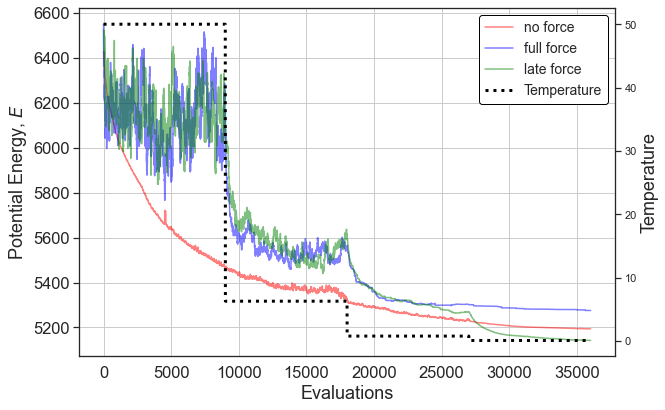

In [15]:
fname1 = f"90_exponential_even_spacing_4_100_noforce_nowavy"
fname2 = f"90_exponential_even_spacing_4_100_force_nowavy" # should be no force
fname3 = f"90_exponential_even_spacing_4_100_lateforce_nowavy" # should be late force

plotting.plot_convergence_only_raw(fname1,fname2,fname3,schedule='text',plot_temp=True, folder='logged_data/90_particles',pic_name='local_convergence')

## Temperature dependent variance

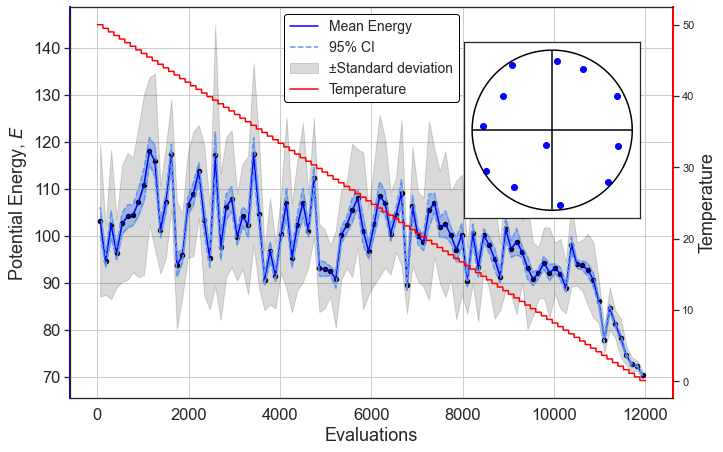

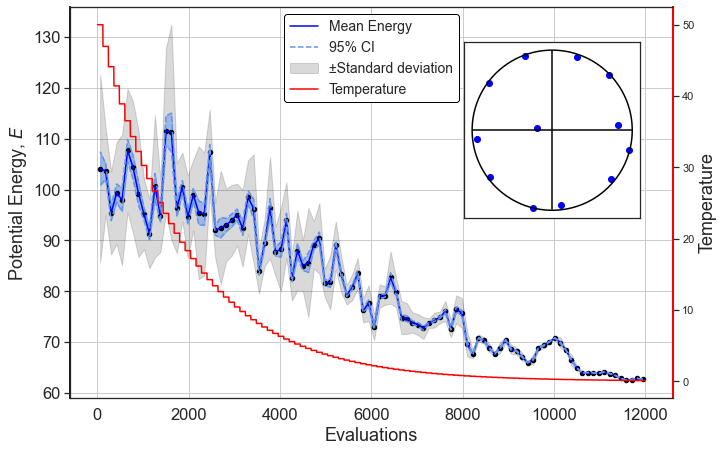

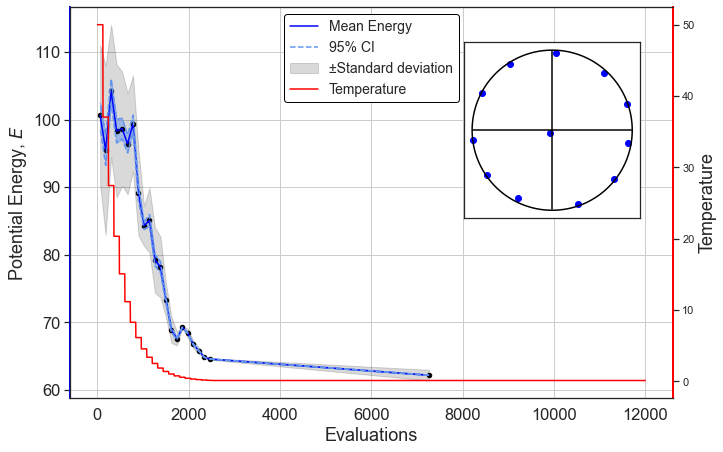

In [16]:
plotting.plot_convergence('12_linear_100_10_noforce_nowavy', plot_std=True, folder='logged_data/noforce_non_wavy_12',
                          pic_name="nowavy_variance_linear")
plotting.plot_convergence('12_exponential_even_spacing_100_10_noforce_nowavy', plot_std=True,
                          folder='logged_data/noforce_non_wavy_12', pic_name="nowavy_variance_evenspacing")
plotting.plot_convergence('12_exponential_0.003_100_10_noforce_nowavy', plot_std=True,
                          folder='logged_data/noforce_non_wavy_12', pic_name="nowavy_variance_0003")

## Late MC neighbouring

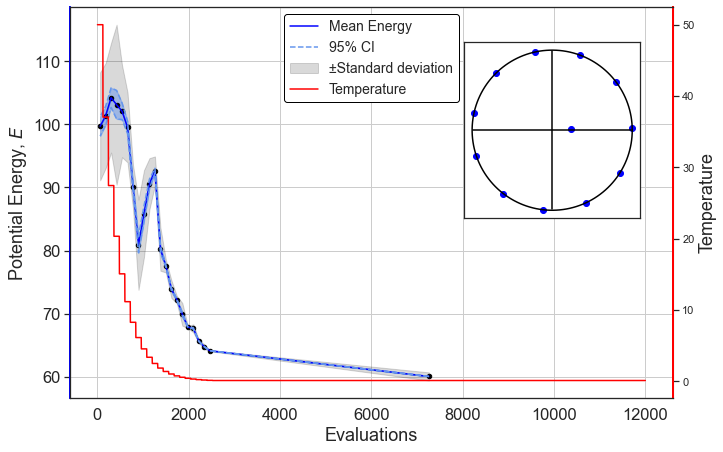

In [17]:
plotting.plot_convergence('12_exponential_0.003_100_10_halfforce_nowavy', plot_std=True,
                          folder='logged_data/final_data_nocategory', pic_name="nowavy_variance_0003")